<a href="https://colab.research.google.com/github/Reape4er/computer_math/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%9610_%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%B8_%D0%BF%D1%80%D0%BE%D0%B3%D0%BD%D0%BE%D0%B7%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%B2%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D1%85_%D1%80%D1%8F%D0%B4%D0%BE%D0%B2_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практическая работа №10. Визуализация, анализ и прогнозирование временных рядов

# Блок №1. Теория

## 1. Регистрация и получение API ключа


Перед началом работы с API OpenWeatherMap, вам необходимо зарегистрироваться на сайте OpenWeatherMap и получить API ключ. Этот ключ будет использоваться для аутентификации ваших запросов к API.

In [2]:
API_KEY = "e27453055a1ed8a1af5b99936645351a"

## 2. Установка необходимых библиотек


Убедитесь, что у вас установлены следующие библиотеки:
```python
pip install requests pandas plotly scikit-learn
```

*(установлены по умолчанию в colab)*

## 3. Получение и обработка данных о погоде
Следующий код демонстрирует, как получить данные о погоде для списка городов и стран:



In [85]:
import requests  # Импорт библиотеки requests для отправки HTTP-запросов
import pandas as pd  # Импорт библиотеки pandas для обработки и анализа данных

API_KEY = "e27453055a1ed8a1af5b99936645351a"  # Ключ API для доступа к данным OpenWeatherMap
locations = ["Paris,FR", "Berlin,DE", "Moscow,RU"]  # Список мест, для которых вы хотите получить данные о погоде

weather_data_list = []  # Пустой список для хранения данных о погоде

# Цикл по всем местам в списке locations
for location in locations:
    city, country = location.split(',')  # Разделение строки на город и страну
    # Формирование URL для запроса геокодирования
    geocode_url = f"http://api.openweathermap.org/geo/1.0/direct?q={city},{country}&limit=1&appid={API_KEY}"
    geocode_response = requests.get(geocode_url).json()  # Отправка запроса и получение ответа в формате JSON
    print(geocode_response)
    print(geocode_url)
    # Если ответ не пустой
    if geocode_response:
        latitude = geocode_response[0]['lat']  # Получение широты из ответа
        longitude = geocode_response[0]['lon']  # Получение долготы из ответа
        # Формирование URL для запроса прогноза погоды
        forecast_url = f"http://api.openweathermap.org/data/2.5/forecast?lat={latitude}&lon={longitude}&appid={API_KEY}"
        forecast_data = requests.get(forecast_url).json()['list']  # Отправка запроса и получение данных прогноза
        # Цикл по всем записям в данных прогноза
        for entry in forecast_data:
            # Добавление данных о погоде в список
            weather_data_list.append({
                "city": city,
                "country": country,
                "latitude": latitude,
                "longitude": longitude,
                "datetime": entry['dt_txt'],
                "temperature": entry["main"]["temp"] - 273.15,  # Преобразование температуры из Кельвинов в градусы Цельсия
                "humidity": entry["main"]["humidity"],  # Влажность
                "description": entry["weather"][0]["description"]  # Описание погоды
            })

# Преобразование списка в DataFrame
weather_data = pd.DataFrame(weather_data_list)
# Преобразование строки с датой и временем в объект datetime
weather_data['datetime'] = pd.to_datetime(weather_data['datetime'])


[{'name': 'Paris', 'local_names': {'fa': 'پاریس', 'ga': 'Páras', 'gn': 'Parĩ', 'uz': 'Parij', 'tk': 'Pariž', 'kk': 'Париж', 'br': 'Pariz', 'af': 'Parys', 'oc': 'París', 'ur': 'پیرس', 'ku': 'Parîs', 'gv': 'Paarys', 'zh': '巴黎', 'cu': 'Парижь', 'ky': 'Париж', 'no': 'Paris', 'lt': 'Paryžius', 'kn': 'ಪ್ಯಾರಿಸ್', 'li': 'Paries', 'so': 'Baariis', 'be': 'Парыж', 'bg': 'Париж', 'gu': 'પૅરિસ', 'vi': 'Paris', 'zu': 'IParisi', 'sr': 'Париз', 'ml': 'പാരിസ്', 'an': 'París', 'ps': 'پاريس', 'uk': 'Париж', 'bn': 'প্যারিস', 'co': 'Parighji', 'te': 'పారిస్', 'km': 'ប៉ារីស', 'ug': 'پارىژ', 'sl': 'Pariz', 'ko': '파리', 'sc': 'Parigi', 'sv': 'Paris', 'eu': 'Paris', 'ta': 'பாரிஸ்', 'eo': 'Parizo', 'yo': 'Parisi', 'is': 'París', 'tl': 'Paris', 'fi': 'Pariisi', 'mr': 'पॅरिस', 'pl': 'Paryż', 'mk': 'Париз', 'am': 'ፓሪስ', 'la': 'Lutetia', 'os': 'Париж', 'ba': 'Париж', 'sk': 'Paríž', 'ja': 'パリ', 'cs': 'Paříž', 'lb': 'Paräis', 'pa': 'ਪੈਰਿਸ', 'lv': 'Parīze', 'bs': 'Pariz', 'ha': 'Pariis', 'hu': 'Párizs', 'or': 'ପ୍ୟାରିସ'

In [86]:
weather_data

,city,country,latitude,longitude,datetime,temperature,humidity,description
0,Paris,FR,48.858890,2.320041,2024-05-19 12:00:00,17.88,76,light rain
1,Paris,FR,48.858890,2.320041,2024-05-19 15:00:00,18.88,69,light rain
2,Paris,FR,48.858890,2.320041,2024-05-19 18:00:00,18.34,78,light rain
3,Paris,FR,48.858890,2.320041,2024-05-19 21:00:00,15.58,87,light rain
4,Paris,FR,48.858890,2.320041,2024-05-20 00:00:00,13.62,91,broken clouds
...,...,...,...,...,...,...,...,...
115,Moscow,RU,55.750446,37.617494,2024-05-23 21:00:00,10.38,48,few clouds
116,Moscow,RU,55.750446,37.617494,2024-05-24 00:00:00,8.74,53,scattered clouds
117,Moscow,RU,55.750446,37.617494,2024-05-24 03:00:00,9.66,57,clear sky
118,Moscow,RU,55.750446,37.617494,2024-05-24 06:00:00,14.22,41,clear sky


## 4. Визуализация данных
Для визуализации данных о погоде на карте мы можем использовать библиотеку Plotly:


In [87]:
import plotly.express as px  # Импорт модуля plotly.express для создания интерактивных графиков

# Создание диаграммы рассеяния на карте с использованием данных о погоде
fig = px.scatter_mapbox(weather_data,  # Данные для графика
                        lat="latitude",  # Колонка в данных, которая будет использоваться для широты точек на карте
                        lon="longitude",  # Колонка в данных, которая будет использоваться для долготы точек на карте
                        color="temperature",  # Колонка в данных, которая будет использоваться для цвета точек
                        size="humidity",  # Колонка в данных, которая будет использоваться для размера точек
                        hover_name="city",  # Колонка в данных, которая будет отображаться при наведении на точку
                        hover_data=["description"],  # Дополнительные данные, которые будут отображаться при наведении на точку
                        # Создание анимации по времени. Время преобразуется в строку для корректного отображения
                        animation_frame=weather_data['datetime'].dt.strftime('%Y-%m-%d %H:%M:%S'),
                        center={"lat": 50, "lon": 14},  # Центр карты при открытии
                        zoom=3,  # Уровень приближения карты при открытии
                        mapbox_style="carto-positron",  # Стиль карты
                        title="Weather Forecast")  # Заголовок графика

fig.show()  # Отображение графика


In [110]:
import requests
import pandas as pd
import plotly.express as px

# Список городов и стран для запроса
locations = [
    {"city": "New York", "country": "US"},
    # Добавьте другие города и страны по вашему выбору
]

# Запрос данных о погоде
weather_data = []
for loc in locations:
    url = f"http://api.openweathermap.org/data/2.5/weather?q={loc['city']},{loc['country']}&appid={API_KEY}"
    response = requests.get(url)
    data = response.json()
    weather_data.append({
        "city": loc["city"],
        "country": loc["country"],
        "temperature": data["main"]["temp"] - 273.15,  # Кельвины в Цельсии
    })

# Создание DataFrame
df = pd.DataFrame(weather_data)

# Визуализация на тематической карте
fig = px.choropleth(
    df,
    locations="country",
    locationmode="country names",
    color="temperature",
    hover_name="city",
    title="Температура в разных городах",
    color_continuous_scale="Viridis",
)

fig.show()


# Блок 2. Анализ данных

### Задание №1. Получите прогноз погоды на 5 дней по любым 4 городам

In [3]:
import requests  # Импорт библиотеки requests для отправки HTTP-запросов
import pandas as pd  # Импорт библиотеки pandas для обработки и анализа данных

API_KEY = "e27453055a1ed8a1af5b99936645351a"
locations = [
  "Saint Petersburg,RUS",
  "Novosibirsk,RUS",
  "Ekaterinburg,RUS",
  "Nizhny Novgorod,RUS"
]
# locations = [
#   "Paris,FRA",
#   "Madrid,ES",
#   "Berlin,DE",
#   "Amsterdam,NL",
#   "Vienna, AT"
# ]
weather_data_list = []

for location in locations:
    city, country = location.split(',')  # Разделение строки на город и страну
    # Формирование URL для запроса геокодирования
    geocode_url = f"http://api.openweathermap.org/geo/1.0/direct?q={city},{country}&limit=1&appid={API_KEY}"
    geocode_response = requests.get(geocode_url).json()  # Отправка запроса и получение ответа в формате JSON
    # Если ответ не пустой
    if geocode_response:
        latitude = geocode_response[0]['lat']  # Получение широты из ответа
        longitude = geocode_response[0]['lon']  # Получение долготы из ответа
        # Формирование URL для запроса прогноза погоды
        forecast_url = f"http://api.openweathermap.org/data/2.5/forecast?lat={latitude}&lon={longitude}&appid={API_KEY}"
        forecast_data = requests.get(forecast_url).json()['list']  # Отправка запроса и получение данных прогноза
        print(forecast_data)
        # Цикл по всем записям в данных прогноза
        for entry in forecast_data:
            # Добавление данных о погоде в список
            weather_data_list.append({
                "city": city,
                "country": country,
                "latitude": latitude,
                "longitude": longitude,
                "datetime": entry['dt_txt'],
                "temperature": entry["main"]["temp"] - 273.15,  # Преобразование температуры из Кельвинов в градусы Цельсия
                'feels_like': entry["main"]["feels_like"] - 273.15,
                "temp_min": entry["main"]["temp_min"] - 273.15,
                "temp_max": entry["main"]["temp_max"] - 273.15,
                "humidity": entry["main"]["humidity"],  # Влажность
                "pressure": entry["main"]["pressure"],  # давление
                "sea_level": entry["main"]["sea_level"],  # Описание погоды
                "grnd_level": entry["main"]["grnd_level"],
                "temp_kf": entry["main"]["temp_kf"],
                "description": entry["weather"][0]["description"]  # Описание погоды

            })

[{'dt': 1716141600, 'main': {'temp': 294.19, 'feels_like': 293.32, 'temp_min': 286.89, 'temp_max': 294.19, 'pressure': 1011, 'sea_level': 1011, 'grnd_level': 1010, 'humidity': 37, 'temp_kf': 7.3}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'clouds': {'all': 0}, 'wind': {'speed': 1.82, 'deg': 257, 'gust': 4.61}, 'visibility': 10000, 'pop': 0, 'sys': {'pod': 'd'}, 'dt_txt': '2024-05-19 18:00:00'}, {'dt': 1716152400, 'main': {'temp': 291.45, 'feels_like': 290.51, 'temp_min': 285.97, 'temp_max': 291.45, 'pressure': 1011, 'sea_level': 1011, 'grnd_level': 1010, 'humidity': 45, 'temp_kf': 5.48}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'clouds': {'all': 13}, 'wind': {'speed': 2.29, 'deg': 247, 'gust': 6.76}, 'visibility': 10000, 'pop': 0, 'sys': {'pod': 'n'}, 'dt_txt': '2024-05-19 21:00:00'}, {'dt': 1716163200, 'main': {'temp': 287.78, 'feels_like': 286.73, 'temp_min': 284.58, 'temp_max': 287.78, 'pressu

In [4]:
# Преобразование списка в DataFrame
weather_data = pd.DataFrame(weather_data_list)
# Преобразование строки с датой и временем в объект datetime
weather_data['datetime'] = pd.to_datetime(weather_data['datetime'])

In [5]:
weather_data

,city,country,latitude,longitude,datetime,temperature,feels_like,temp_min,temp_max,humidity,pressure,sea_level,grnd_level,temp_kf,description
0,Saint Petersburg,RUS,59.938732,30.316229,2024-05-19 18:00:00,21.04,20.17,13.74,21.04,37,1011,1011,1010,7.30,clear sky
1,Saint Petersburg,RUS,59.938732,30.316229,2024-05-19 21:00:00,18.30,17.36,12.82,18.30,45,1011,1011,1010,5.48,few clouds
2,Saint Petersburg,RUS,59.938732,30.316229,2024-05-20 00:00:00,14.63,13.58,11.43,14.63,55,1012,1012,1010,3.20,scattered clouds
3,Saint Petersburg,RUS,59.938732,30.316229,2024-05-20 03:00:00,11.37,10.42,11.37,11.37,71,1013,1013,1011,0.00,scattered clouds
4,Saint Petersburg,RUS,59.938732,30.316229,2024-05-20 06:00:00,16.54,15.69,16.54,16.54,55,1015,1015,1013,0.00,scattered clouds
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,Nizhny Novgorod,RUS,56.326482,44.005139,2024-05-24 03:00:00,7.74,5.57,7.74,7.74,63,1030,1030,1019,0.00,overcast clouds
156,Nizhny Novgorod,RUS,56.326482,44.005139,2024-05-24 06:00:00,12.51,11.04,12.51,12.51,47,1030,1030,1019,0.00,overcast clouds
157,Nizhny Novgorod,RUS,56.326482,44.005139,2024-05-24 09:00:00,17.04,15.71,17.04,17.04,35,1029,1029,1018,0.00,broken clouds
158,Nizhny Novgorod,RUS,56.326482,44.005139,2024-05-24 12:00:00,18.49,17.39,18.49,18.49,38,1028,1028,1017,0.00,broken clouds


### Задание №2. Вычислите общее среднее значение и стандартное отклонение температуры по всем городам

In [186]:
mean_temperature = weather_data['temperature'].mean()

std_dev_temperature = weather_data['temperature'].std()

display(mean_temperature)
display(std_dev_temperature)

12.649812500000024

5.132114141570403

### Задание №3. Визуализируйте распределения температуры по дням. Отдельно по каждому городу (На одной плоскости должно быть четыре графика)


##### Пример визуализации по одному городу:

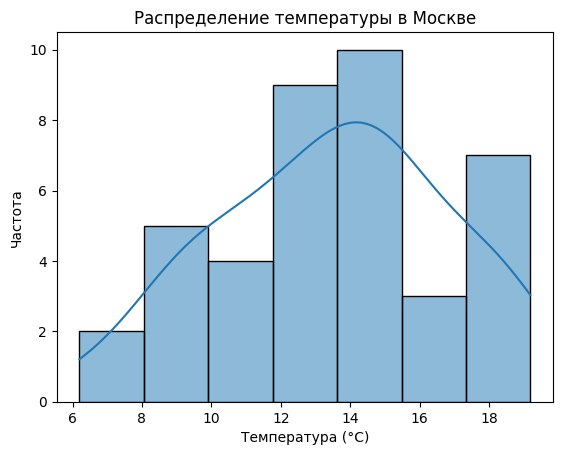

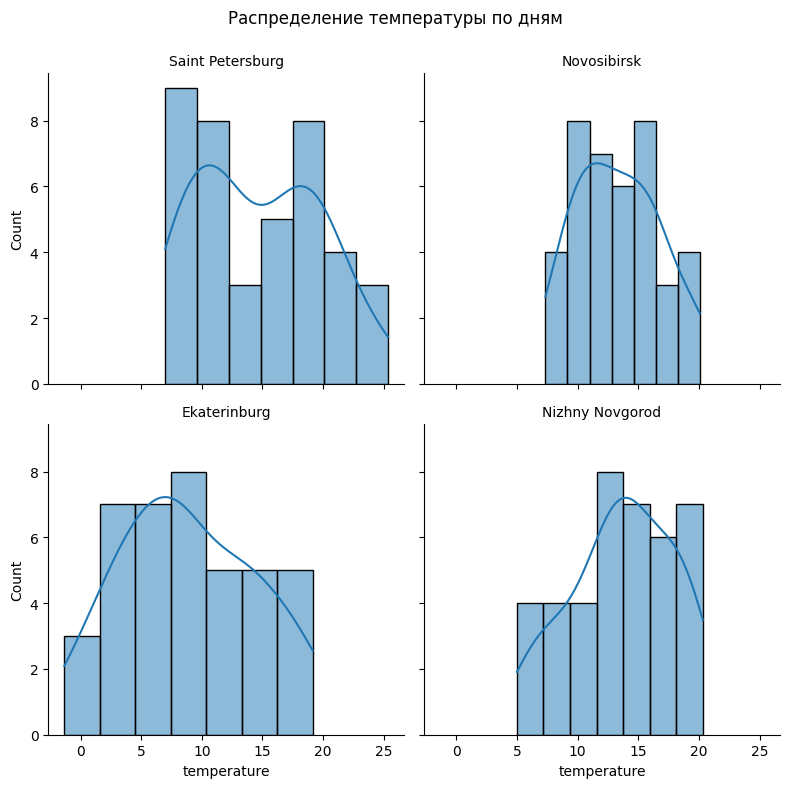

In [190]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.FacetGrid(weather_data, col="city", col_wrap=2, height=4)
g.map(sns.histplot, "temperature", kde=True)

g.set_titles("{col_name}")

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Распределение температуры по дням')

plt.show()

### Задание №4. Визуализируйте Корреляционну матрицу. Отдельно по каждому городу (На одной плоскости должно быть четыре графика). Затем общую корреляционную матрицу по всем данным из набора.


##### Пример визуализации по одному городу:

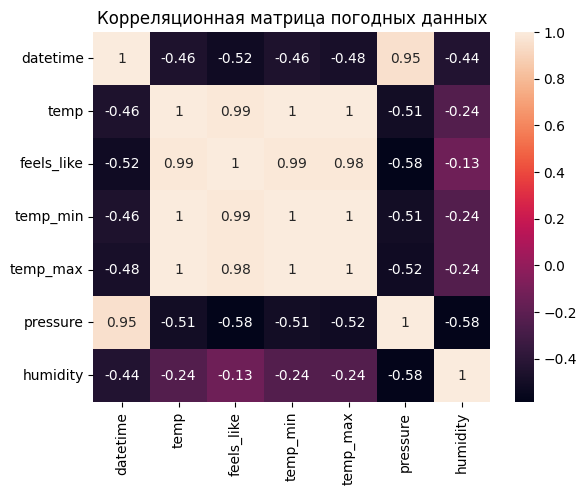

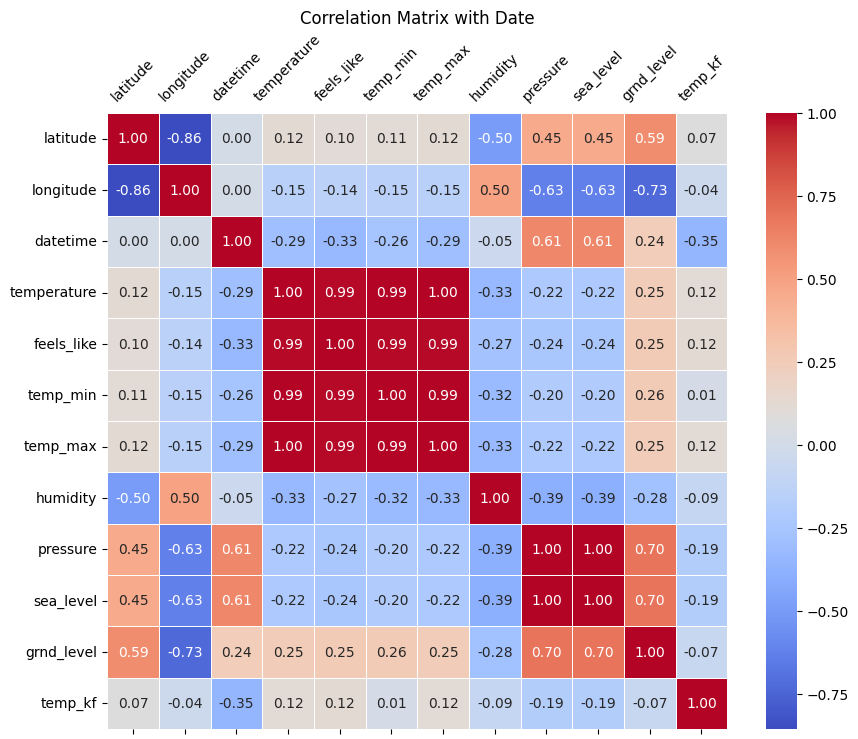

In [191]:

#city	country	latitude	longitude	datetime	temperature	feels_like	temp_min	temp_max	humidity	pressure	sea_level	grnd_level	temp_kf	description
numeric_data = weather_data[['latitude',	'longitude',	'datetime',	'temperature',	'feels_like',	'temp_min',	'temp_max',	'humidity',	'pressure', 'sea_level','grnd_level','temp_kf']]

correlation_matrix = numeric_data.corr()

plt.figure(figsize=(10, 8))
ax = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix with Date')

ax.tick_params(axis='x', labeltop=True, labelbottom=False, labelrotation=45)
ax.tick_params(axis='y', labelleft=True, labelrotation=0)  #
ax.xaxis.set_label_position('top')

plt.show()

### Задание №5. Визуализируйте тренд изменения температуры со временем. Отдельно по каждому городу (На одной плоскости должно быть четыре графика).

##### Пример визуализации по одному городу:

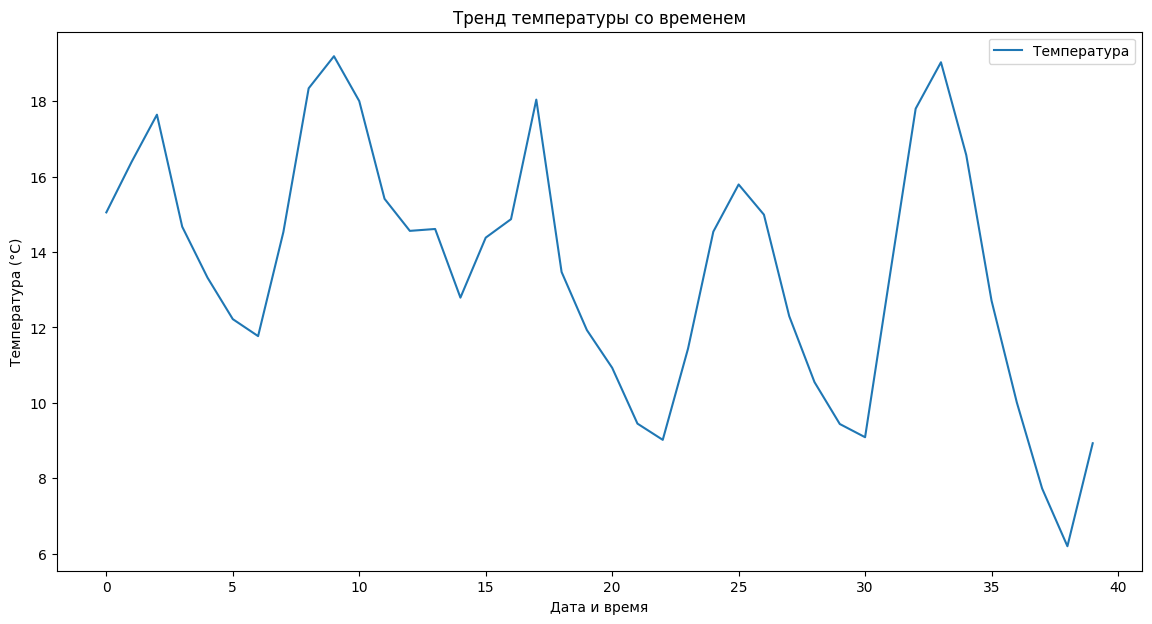

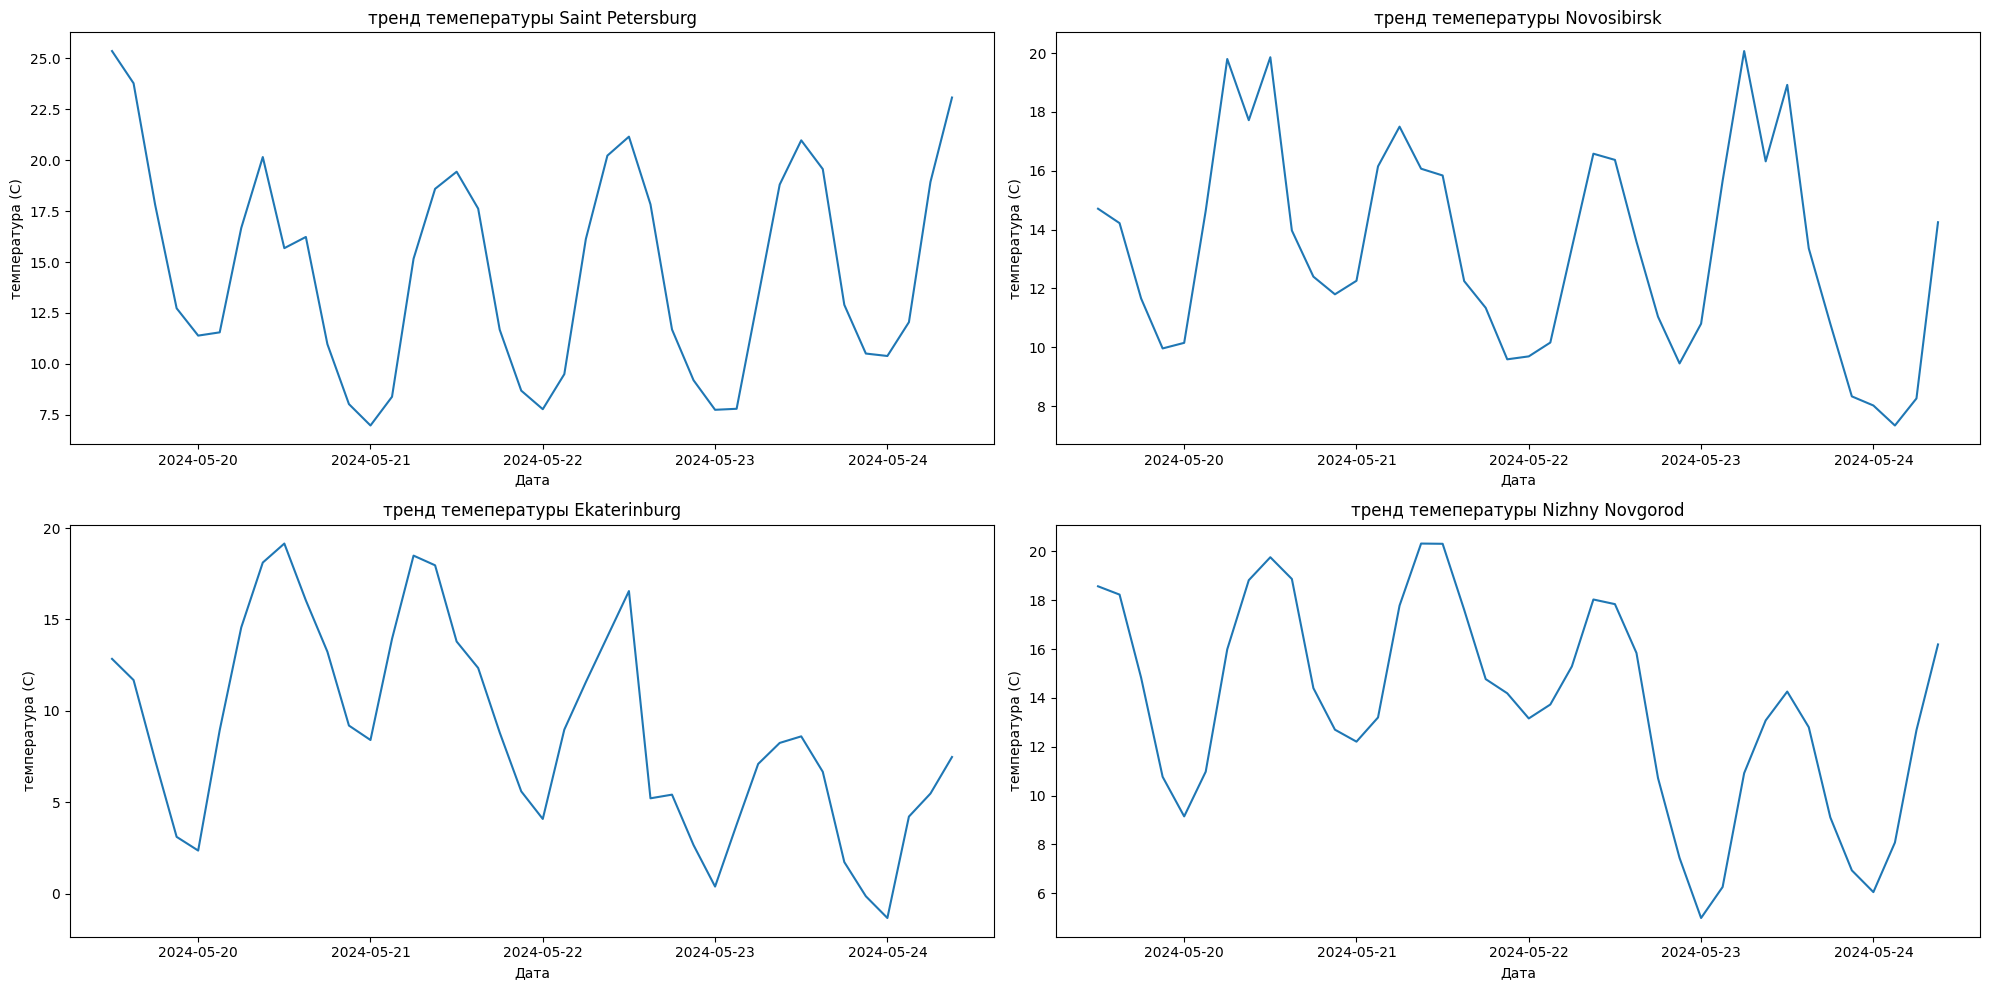

In [196]:
cities = weather_data['city'].unique()

fig, axes = plt.subplots(2, 2, figsize=(20, 10))

for i, city in enumerate(cities):
    city_data = weather_data[weather_data['city'] == city]
    ax = axes[i // 2, i % 2]
    sns.lineplot(x='datetime', y='temperature', data=city_data, ax=ax)
    ax.set_title(f'тренд темепературы {city}')
    ax.set_ylabel('температура (C)')
    ax.set_xlabel('Дата')

fig.tight_layout()
plt.show()

### Задание №6.1. Отобразите среднюю дневную (с 04:00 до 23:00) температуру для каждого города (На одной плоскости должно быть четыре графика):

##### Пример визуализации по одному городу:

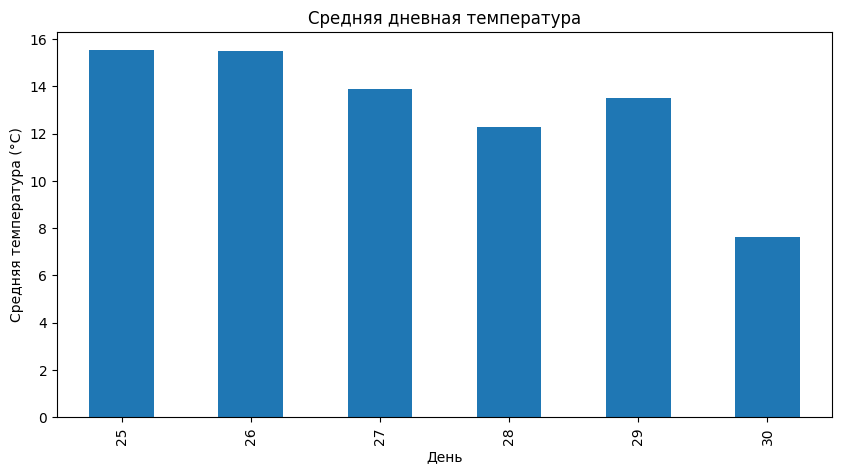

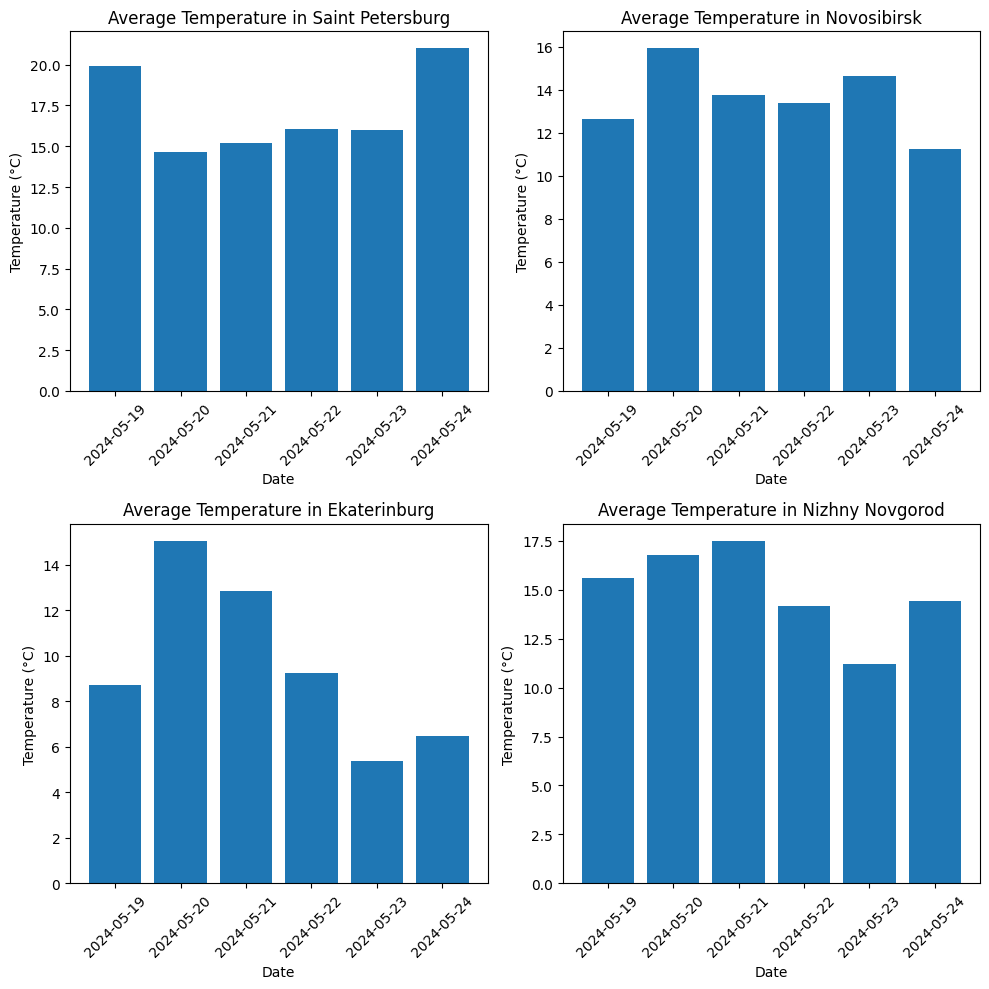

In [197]:
weather_data = weather_data[(weather_data['datetime'].dt.hour >= 4) & (weather_data['datetime'].dt.hour < 23)]

daily_avg_temp = weather_data.groupby([weather_data['datetime'].dt.date, 'city'])['temperature'].mean().reset_index()

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs = axs.flatten()

for i, city in enumerate(cities[:4]):
    city_data = daily_avg_temp[daily_avg_temp['city'] == city]
    axs[i].bar(city_data['datetime'], city_data['temperature'])
    axs[i].set_title(f'Average Temperature in {city}')
    axs[i].set_xlabel('Date')
    axs[i].set_ylabel('Temperature (°C)')
    axs[i].tick_params(axis='x', rotation=45)

plt.tight_layout()

plt.show()

### Задание №6.2. Отобразите среднюю дневную (с 04:00 до 23:00) и ночную (с 23:00 до 04:00) температуру для каждого города (На одной плоскости должно быть четыре графика):

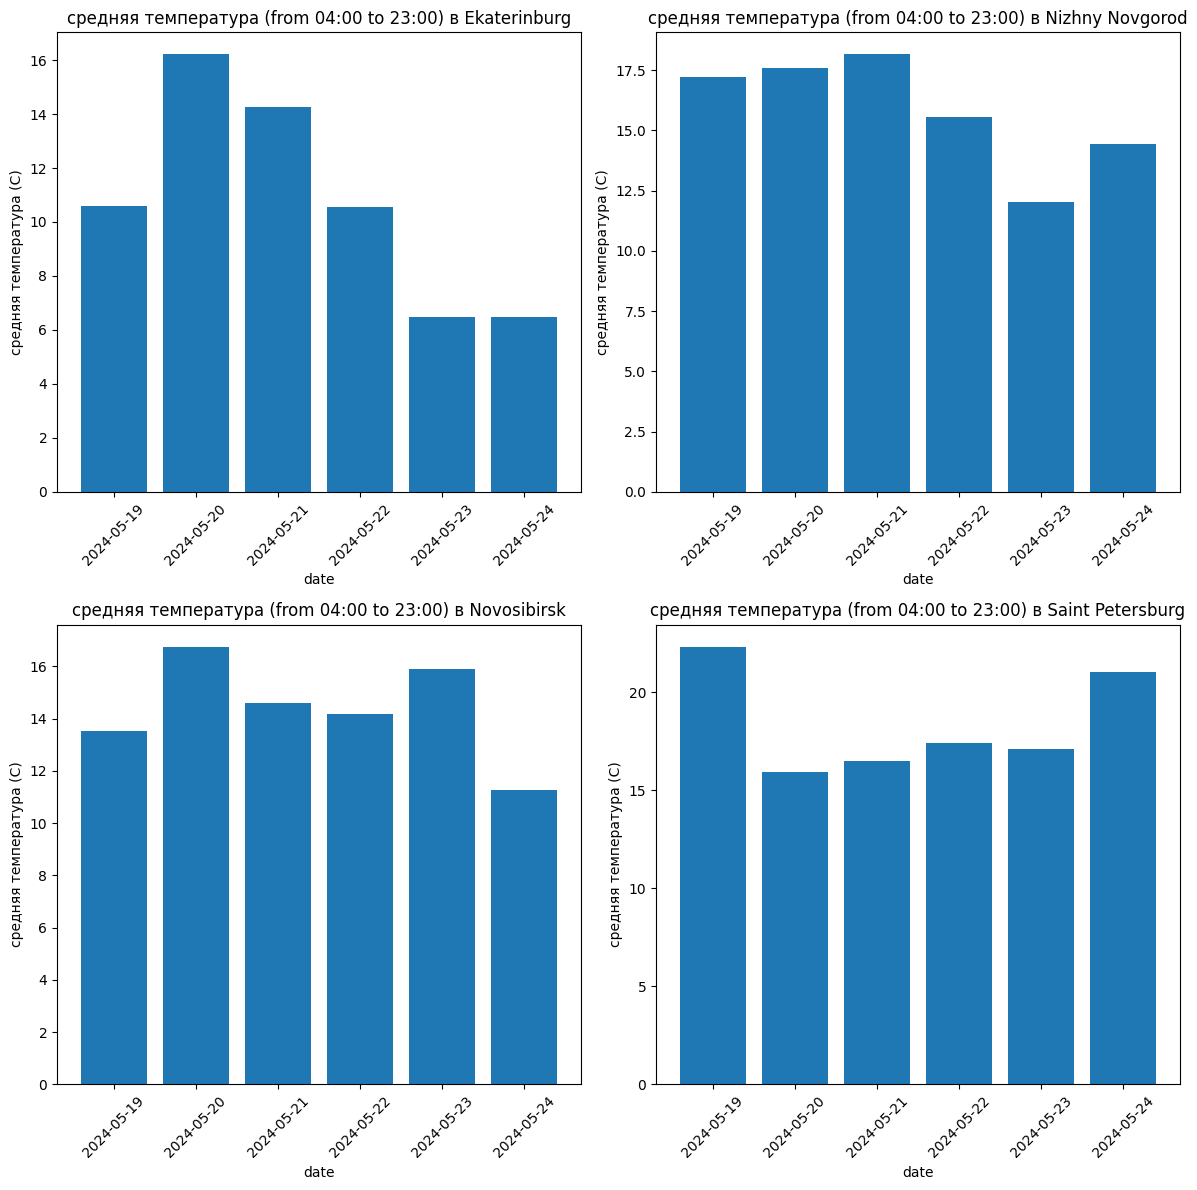

,city,country,latitude,longitude,datetime,temperature,feels_like,temp_min,temp_max,humidity,pressure,sea_level,grnd_level,temp_kf,description
0,Saint Petersburg,RUS,59.938732,30.316229,2024-05-19 12:00:00,25.35,24.80,25.07,25.35,33,1011,1011,1011,0.28,clear sky
1,Saint Petersburg,RUS,59.938732,30.316229,2024-05-19 15:00:00,23.77,23.19,20.60,23.77,38,1011,1011,1010,3.17,clear sky
2,Saint Petersburg,RUS,59.938732,30.316229,2024-05-19 18:00:00,17.82,16.99,14.05,17.82,51,1012,1012,1010,3.77,clear sky
3,Saint Petersburg,RUS,59.938732,30.316229,2024-05-19 21:00:00,12.73,11.63,12.73,12.73,60,1012,1012,1010,0.00,clear sky
6,Saint Petersburg,RUS,59.938732,30.316229,2024-05-20 06:00:00,16.67,15.83,16.67,16.67,55,1015,1015,1013,0.00,few clouds
7,Saint Petersburg,RUS,59.938732,30.316229,2024-05-20 09:00:00,20.15,19.40,20.15,20.15,45,1016,1016,1014,0.00,few clouds
8,Saint Petersburg,RUS,59.938732,30.316229,2024-05-20 12:00:00,15.68,14.69,15.68,15.68,53,1017,1017,1015,0.00,broken clouds
9,Saint Petersburg,RUS,59.938732,30.316229,2024-05-20 15:00:00,16.23,14.77,16.23,16.23,33,1018,1018,1016,0.00,broken clouds
10,Saint Petersburg,RUS,59.938732,30.316229,2024-05-20 18:00:00,10.97,9.19,10.97,10.97,41,1020,1020,1017,0.00,overcast clouds
11,Saint Petersburg,RUS,59.938732,30.316229,2024-05-20 21:00:00,8.03,7.43,8.03,8.03,44,1021,1021,1018,0.00,broken clouds


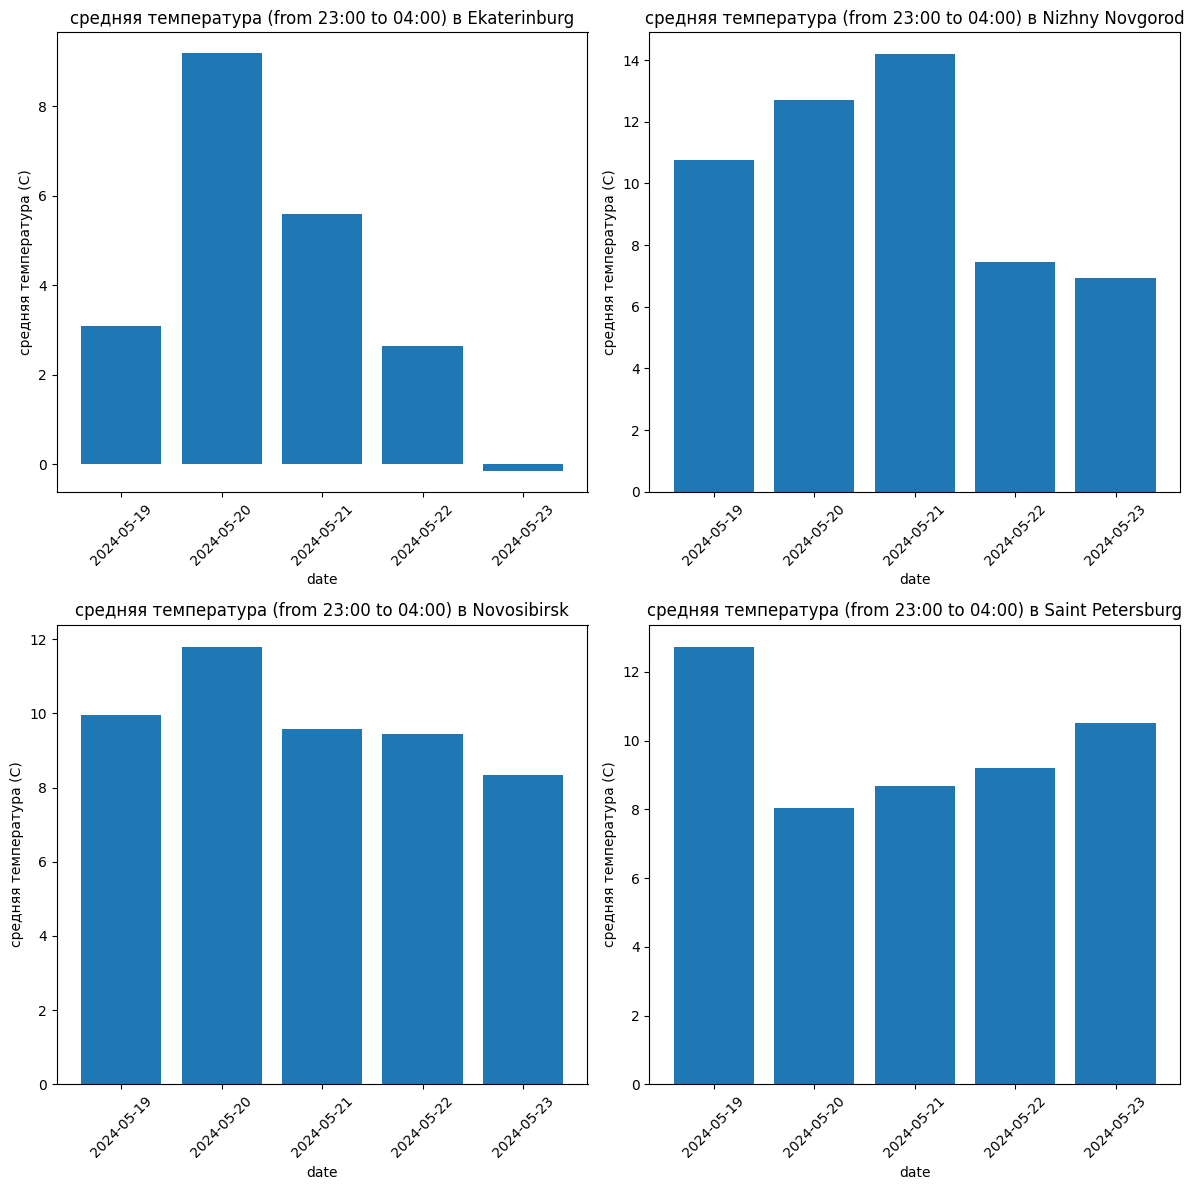

In [220]:
def process_and_plot(weather_data, start_hour, end_hour, title):
    if start_hour < end_hour:
        filtered_data = weather_data[(weather_data['datetime'].dt.hour >= start_hour) & (weather_data['datetime'].dt.hour < end_hour)]
    else:
        filtered_data = weather_data[(weather_data['datetime'].dt.hour >= start_hour) | (weather_data['datetime'].dt.hour < end_hour)]


    daily_avg_temp = filtered_data.groupby([filtered_data['datetime'].dt.date, 'city'])['temperature'].mean().reset_index()

    cities = daily_avg_temp['city'].unique()

    n_rows = 2
    n_cols = 2

    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12, 12))

    axes = axes.flatten()

    for ax, city in zip(axes, cities):
        city_data = daily_avg_temp[daily_avg_temp['city'] == city]
        ax.bar(city_data['datetime'], city_data['temperature'])
        ax.set_title(f'средняя температура {title} в {city}')
        ax.set_ylabel('средняя температура (C)')
        ax.set_xlabel('date')
        ax.tick_params(axis='x', rotation=45)

    for i in range(len(cities), len(axes)):
        axes[i].set_visible(False)

    plt.tight_layout()
    plt.show()

# Assuming weather_data is already defined and has a datetime column
process_and_plot(weather_data, 6, 21, "(from 04:00 to 23:00)")
display(weather_data.head(20))
process_and_plot(weather_data, 21, 6, "(from 23:00 to 04:00)")

### Задание №7. Постройте точечный график зависимости температуры от влажности для каждого города (На одной плоскости должно быть четыре графика):

##### Пример визуализации по одному городу:

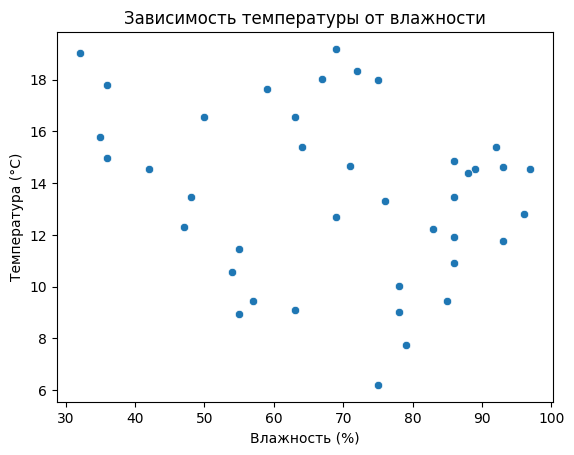

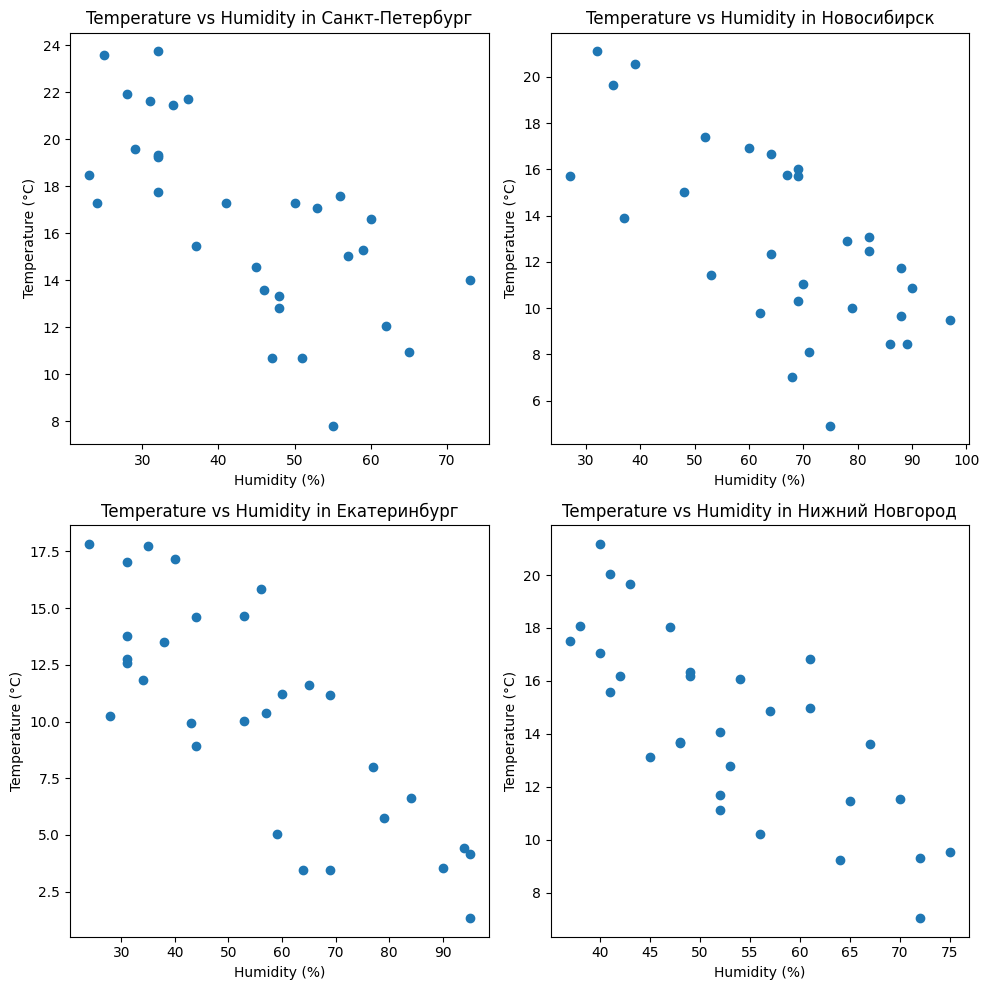

In [ ]:
cities = weather_data['city'].unique()
n_cities = len(cities)

n_rows = 2
n_cols = 2

fig, axs = plt.subplots(n_rows, n_cols, figsize=(10, 10))

axs = axs.flatten()

for ax, city in zip(axs, cities):
    city_data = weather_data[weather_data['city'] == city]
    ax.scatter(city_data['humidity'], city_data['temperature'])
    ax.set_title(f'Temperature vs Humidity in {city}')
    ax.set_xlabel('Humidity (%)')
    ax.set_ylabel('Temperature (°C)')

for i in range(n_cities, len(axs)):
    axs[i].set_visible(False)

plt.tight_layout()

# Show the plot
plt.show()

### Задание №8. Отобразите среднюю почасовую температуру для каждого города (На одной плоскости должно быть четыре графика):

##### Пример визуализации по одному городу:

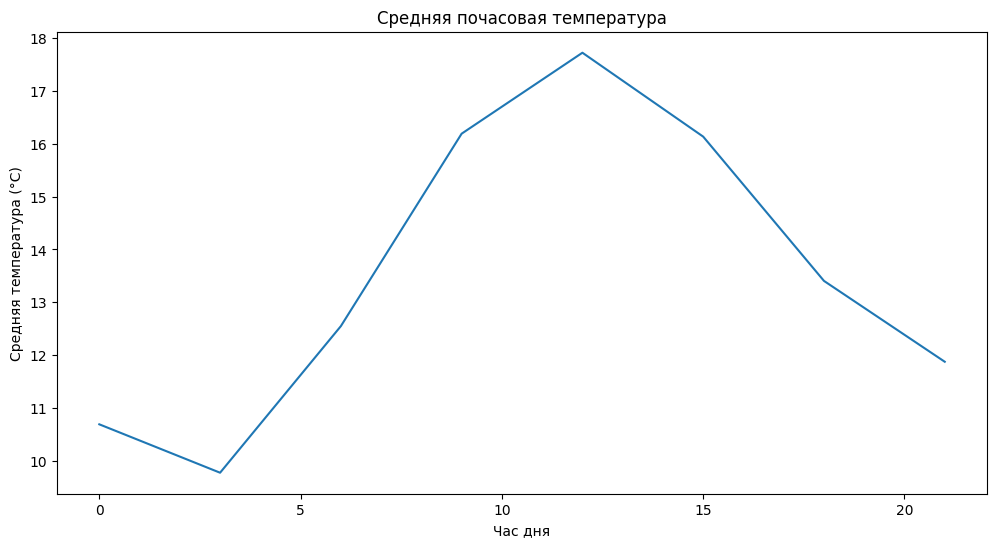

0      15
1      18
2      21
5       6
6       9
       ..
153    18
154    21
157     6
158     9
159    12
Name: datetime, Length: 120, dtype: int32

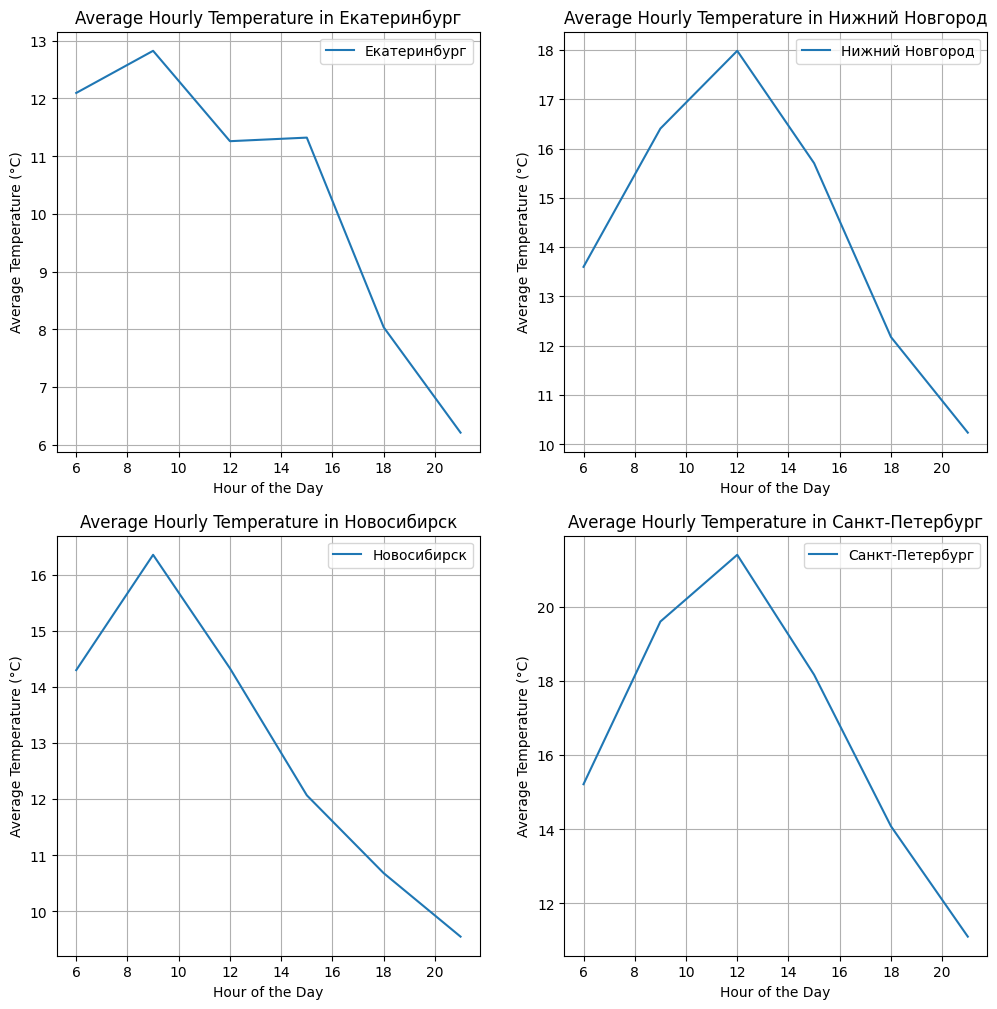

In [ ]:
import matplotlib.pyplot as plt

hourly_avg_temp = weather_data.groupby([weather_data['datetime'].dt.hour, 'city']).temperature.mean().unstack()
display(weather_data['datetime'].dt.hour)

n_rows = 2
n_cols = 2

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 12))
axes = axes.flatten()

cities = hourly_avg_temp.columns
for ax, city in zip(axes, cities):
    ax.plot(hourly_avg_temp.index, hourly_avg_temp[city], label=city)
    ax.set_title(f'Average Hourly Temperature in {city}')
    ax.set_xlabel('Hour of the Day')
    ax.set_ylabel('Average Temperature (°C)')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

# Блок 3. Прогнозирование

### Интегрируйте Вашу реализацию модели линейной регрессии из предыдущих работ:

In [6]:
import numpy as np
class LinearRegression:
    def __init__(self):
        self.theta = None
    def fit(self, X, y):
        X = np.insert(X, 0, 1, axis=1)

        Xt = np.transpose(X)

        Xt_X = Xt @ X

        inv_Xt_X = np.linalg.pinv(Xt_X)

        Xt_y = Xt @ y

        self.theta = inv_Xt_X @ Xt_y
        return self.theta

    def predict(self, X):
        X = np.insert(X, 0, 1, axis=1)
        prediction = X@self.theta
        return prediction

    def score(self, X, y):
        yp = self.predict(X)
        SS_res = np.sum((y - yp)**2)
        y_mean = np.mean(y)
        SS_tot = np.sum((y - y_mean)**2)
        R2_score = 1 - (SS_res/SS_tot)
        return R2_score

### Задание №1. Обучите модель регрессии предсказывать погоду на будущее (остальные признаки на будущее также вычисляются с помощью регрессии):

In [ ]:
# #, 'temp_kf'
# import numpy as np

# features = ['latitude', 'longitude', 'humidity', 'sea_level', 'grnd_level', 'temperature', 'temp_min', 'temp_max', 'pressure']
# features_to_predict = ['humidity', 'sea_level', 'pressure', 'temperature', 'temp_min', 'temp_max']
# predictors = {}
# results = {}

# for target in features_to_predict:
#     if target in ['temperature', 'temp_min', 'temp_max']:
#         excluded_features = ['temperature', 'temp_min', 'temp_max']
#     else:
#         excluded_features = [target]
#     X = weather_data[[col for col in features if col not in excluded_features]].values
#     y = weather_data[target].values
#     X = np.nan_to_num(X)
#     y = np.nan_to_num(y)

#     train_ratio = 0.8
#     cutoff = int(X.shape[0] * train_ratio)
#     X_train, X_test = X[:cutoff], X[cutoff:]
#     y_train, y_test = y[:cutoff], y[cutoff:]

#     model = LinearRegression()
#     model.fit(X_train, y_train)

#
#     predictors[target] = model
#     results[target] = R2_score


In [7]:
def train_models(data):
    features = ['latitude', 'longitude', 'humidity', 'sea_level', 'grnd_level', 'temperature', 'temp_min', 'temp_max', 'pressure']
    features_to_predict = ['humidity', 'sea_level', 'pressure', 'temperature', 'temp_min', 'temp_max']

    predictors = {}

    for target in features_to_predict:
        if target in ['temperature', 'temp_min', 'temp_max']:
            excluded_features = ['temperature', 'temp_min', 'temp_max']
        else:
            excluded_features = [target]

        X = data[[col for col in features if col not in excluded_features]].values
        y = data[target].values
        X = np.nan_to_num(X)
        y = np.nan_to_num(y)

        model = LinearRegression()
        model.fit(X, y)

        predictors[target] = model

    return predictors



Выведите оценку точности:

In [ ]:
# data = weather_data.copy()

# data['datetime'] = pd.to_datetime(data['datetime'])

# data['datetime'] = data['datetime'].dt.hour

# predictors = train_models(data)
# for feature, result in results.items():
#   print(f'признак {feature}, результат {result}')
# print(predictors)

NameError: name 'results' is not defined

### Задание №2. Обучите модель регрессии предсказывать погоду на будущее, вспомогательные признаки для прогноза должны передаваться пользователем:

(Модель получает на вход признаки за предыдущие дни, затем значения признаков за будущие дни и возвращает погоду на будущие дни)

In [8]:
def predict_weather(predictors, data):
  features = ['latitude', 'longitude', 'humidity', 'sea_level', 'grnd_level', 'temperature', 'temp_min', 'temp_max', 'pressure']
  features_to_predict = ['humidity', 'sea_level', 'pressure', 'temperature', 'temp_min', 'temp_max']

  result = []
  R2 = {}

  for target in features_to_predict:
    if target in ['temperature', 'temp_min', 'temp_max']:
        excluded_features = ['temperature', 'temp_min', 'temp_max']
    else:
        excluded_features = [target]

    X = data[[col for col in features if col not in excluded_features]].values
    X = np.nan_to_num(X)

    y = data[target].values

    result.append(predictors[target].predict(X))
    R2[target] = predictors[target].score(X,y)
  result = np.array(result).transpose()

  df = pd.DataFrame(result, columns=predictors.keys())

  return df, R2

In [10]:
train_ratio = 0.8
# cutoff = int(X.shape[0] * train_ratio)
# X_train, X_test = X[:cutoff], X[cutoff:]
# y_train, y_test = y[:cutoff], y[cutoff:]
cutoff = int(len(weather_data) * 0.8)
train_df = weather_data[:cutoff]
test_df = weather_data[cutoff:]
predictors = train_models(train_df)
# print(predictors)
predicted_weather, r2_score = predict_weather(predictors, test_df)

predicted_weather['city'] = weather_data['city']
predicted_weather['country'] = weather_data['country']
predicted_weather['latitude'] = weather_data['latitude']
predicted_weather['longitude'] = weather_data['longitude']
predicted_weather['datetime'] = weather_data['datetime']
display(predicted_weather)


,humidity,sea_level,pressure,temperature,temp_min,temp_max,city,country,latitude,longitude,datetime
0,59.802460,1017.0,1017.0,14.633248,13.467591,14.633248,Saint Petersburg,RUS,59.938732,30.316229,2024-05-19 18:00:00
1,60.508120,1017.0,1017.0,13.640373,12.484191,13.640373,Saint Petersburg,RUS,59.938732,30.316229,2024-05-19 21:00:00
2,64.805731,1017.0,1017.0,11.754990,10.603599,11.754990,Saint Petersburg,RUS,59.938732,30.316229,2024-05-20 00:00:00
3,60.817007,1018.0,1018.0,10.918153,9.889840,10.918153,Saint Petersburg,RUS,59.938732,30.316229,2024-05-20 03:00:00
4,53.374699,1019.0,1019.0,12.282338,11.366193,12.282338,Saint Petersburg,RUS,59.938732,30.316229,2024-05-20 06:00:00
5,49.101994,1019.0,1019.0,13.298194,12.377014,13.298194,Saint Petersburg,RUS,59.938732,30.316229,2024-05-20 09:00:00
6,47.286648,1019.0,1019.0,13.806122,12.882424,13.806122,Saint Petersburg,RUS,59.938732,30.316229,2024-05-20 12:00:00
7,53.201409,1018.0,1018.0,11.595390,10.563721,11.595390,Saint Petersburg,RUS,59.938732,30.316229,2024-05-20 15:00:00
8,54.921617,1019.0,1019.0,9.934988,9.035033,9.934988,Saint Petersburg,RUS,59.938732,30.316229,2024-05-20 18:00:00
9,63.075121,1018.0,1018.0,9.055750,8.036669,9.055750,Saint Petersburg,RUS,59.938732,30.316229,2024-05-20 21:00:00


Выведите оценку точности:

In [11]:
display(r2_score)

{'humidity': 0.23599590917794733,
 'sea_level': 0.9999999999999998,
 'pressure': 1.0,
 'temperature': 0.18726807700967452,
 'temp_min': -0.024654939673648846,
 'temp_max': 0.18726807700967452}

### Задание №3. Создайте новый датафрейм. Добавьте туда начальные значения температуры и предсказанные, а затем визуализируйте результаты на интерактивном таймфрейме по всем городам:

##### Пример визуализации:

In [12]:
import plotly.express as px  # Импорт модуля plotly.express для создания интерактивных графиков

# Создание диаграммы рассеяния на карте с использованием данных о погоде
fig = px.scatter_mapbox(predicted_weather,  # Данные для графика
                        lat="latitude",  # Колонка в данных, которая будет использоваться для широты точек на карте
                        lon="longitude",  # Колонка в данных, которая будет использоваться для долготы точек на карте
                        color="temperature",  # Колонка в данных, которая будет использоваться для цвета точек
                        size="humidity",  # Колонка в данных, которая будет использоваться для размера точек
                        hover_name="city",  # Колонка в данных, которая будет отображаться при наведении на точку
                        # Создание анимации по времени. Время преобразуется в строку для корректного отображения
                        animation_frame=predicted_weather['datetime'].dt.strftime('%Y-%m-%d %H:%M:%S'),
                        center={"lat": 50, "lon": 14},  # Центр карты при открытии
                        zoom=3,  # Уровень приближения карты при открытии
                        mapbox_style="carto-positron",  # Стиль карты
                        title="Weather Forecast")  # Заголовок графика

fig.show()  # Отображение графика

## Задание №4. Выберите несколько стран, получите прогноз погоды по каждой их них, после чего сформируйте предскзания погоды на будущее и отобразите её в виде таймфрейма, используя px.choropleth() (тематическая карта)

#### Пример использования px.choropleth()

Этот код используется для создания тематической (хороплетной) карты.

* `px.choropleth()` - это функция, которая создает хороплетную карту. В данном случае, она принимает следующие аргументы:

- `gapminder` - набор данных, который будет использоваться для построения карты.
- `locations="iso_alpha"` - указывает на столбец данных, который будет использоваться для определения местоположений на карте. В данном случае, значения из столбца `iso_alpha` будут использоваться для определения местоположений.
- `color="lifeExp"` - указывает на столбец данных, который будет определять цвета на карте. В данном случае, значения из столбца `lifeExp` будут использоваться для определения цвета.
- `hover_name="country"` - указывает на столбец данных, который будет отображаться при наведении на местоположение на карте. В данном случае, значения из столбца `country` будут отображаться при наведении.
- `animation_frame="year"` - указывает на столбец данных, который будет использоваться для создания анимации на карте. В данном случае, значения из столбца `year` будут использоваться для создания анимации, показывая изменения со временем.
- `color_continuous_scale=px.colors.sequential.Plasma` - указывает на цветовую палитру, которая будет использоваться для отображения данных на карте. В данном случае, используется палитра Plasma из библиотеки Plotly Express.
- `projection="natural earth"` - указывает на проекцию карты. В данном случае, используется глобальная проекция карты "natural earth".

В итоге, данный код создаст тематическую (хороплетную) карту, на которой каждое местоположение будет отображаться цветом, соответствующим значению из столбца `lifeExp`. При наведении на каждое местоположение будет отображаться страна из столбца `country`. Карта будет анимированной, показывая изменения со временем, используя значения из столбца `year`. Цвета на карте будут использовать цветовую палитру Plasma, а проекция карты будет глобальной "natural earth".

In [13]:
px.choropleth(
  predicted_weather, # набор данных
  locationmode="ISO-3",
  locations="country", # отображение с помощью цвета color
  color="temperature", # выбор поля для цвета
  hover_name="city", # hover_field_name
  animation_frame=predicted_weather['datetime'].dt.strftime('%Y-%m-%d %H:%M:%S'), # аннотация
  color_continuous_scale=px.colors.sequential.Plasma, # изменение цвета
  projection="natural earth" # параметр проекции: глобальная карта
             )

# Блок №4. Модели прогнозирования семейства ARIMA

## Задание №1. Ознакомьтесь с теоритическим материалом и примерами по ссылке ниже:

### Ссылка: https://colab.research.google.com/drive/1WsEyJxvQ52W5nB3XN7HEfeHI8sgDPDMr?usp=sharing

## Задание №2. Сформируйте прогноз погоды на будущее, используя одну из моделей семейства ARIMA и визуализируйте таймфрейм

In [141]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 20.2 MB/s eta 0:00:00


In [142]:
!pip install statsmodels

In [18]:
import requests  # Импорт библиотеки requests для отправки HTTP-запросов
import pandas as pd  # Импорт библиотеки pandas для обработки и анализа данных
import warnings

warnings.filterwarnings("ignore")

API_KEY = "e27453055a1ed8a1af5b99936645351a"
# locations = [
#   "Saint Petersburg,RUS",
#   "Novosibirsk,RUS",
#   "Ekaterinburg,RUS",
#   "Nizhny Novgorod,RUS"
# ]
locations = [
  "Paris,FRA",
  "Madrid,ES",
  "Berlin,DE",
  "Amsterdam,NL",
  "Vienna, AT"
]
weather_data_list = []

for location in locations:
    city, country = location.split(',')  # Разделение строки на город и страну
    # Формирование URL для запроса геокодирования
    geocode_url = f"http://api.openweathermap.org/geo/1.0/direct?q={city},{country}&limit=1&appid={API_KEY}"
    geocode_response = requests.get(geocode_url).json()  # Отправка запроса и получение ответа в формате JSON
    # Если ответ не пустой
    if geocode_response:
        latitude = geocode_response[0]['lat']  # Получение широты из ответа
        longitude = geocode_response[0]['lon']  # Получение долготы из ответа
        # Формирование URL для запроса прогноза погоды
        forecast_url = f"http://api.openweathermap.org/data/2.5/forecast?lat={latitude}&lon={longitude}&appid={API_KEY}"
        forecast_data = requests.get(forecast_url).json()['list']  # Отправка запроса и получение данных прогноза
        print(forecast_data)
        # Цикл по всем записям в данных прогноза
        for entry in forecast_data:
            # Добавление данных о погоде в список
            weather_data_list.append({
                "city": city,
                "country": country,
                "latitude": latitude,
                "longitude": longitude,
                "datetime": entry['dt_txt'],
                "temperature": entry["main"]["temp"] - 273.15,  # Преобразование температуры из Кельвинов в градусы Цельсия
                'feels_like': entry["main"]["feels_like"] - 273.15,
                "temp_min": entry["main"]["temp_min"] - 273.15,
                "temp_max": entry["main"]["temp_max"] - 273.15,
                "humidity": entry["main"]["humidity"],  # Влажность
                "pressure": entry["main"]["pressure"],  # давление
                "sea_level": entry["main"]["sea_level"],  # Описание погоды
                "grnd_level": entry["main"]["grnd_level"],
                "temp_kf": entry["main"]["temp_kf"],
                "description": entry["weather"][0]["description"]  # Описание погоды

            })
# Преобразование списка в DataFrame
df_weather = pd.DataFrame(weather_data_list)
# Преобразование строки с датой и временем в объект datetime
df_weather['datetime'] = pd.to_datetime(df_weather['datetime'])

[{'dt': 1716141600, 'main': {'temp': 293.97, 'feels_like': 293.54, 'temp_min': 290.91, 'temp_max': 293.97, 'pressure': 1011, 'sea_level': 1011, 'grnd_level': 1001, 'humidity': 55, 'temp_kf': 3.06}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'clouds': {'all': 20}, 'wind': {'speed': 1.36, 'deg': 25, 'gust': 2.59}, 'visibility': 7621, 'pop': 1, 'rain': {'3h': 2.01}, 'sys': {'pod': 'd'}, 'dt_txt': '2024-05-19 18:00:00'}, {'dt': 1716152400, 'main': {'temp': 292.11, 'feels_like': 291.81, 'temp_min': 288.39, 'temp_max': 292.11, 'pressure': 1011, 'sea_level': 1011, 'grnd_level': 1002, 'humidity': 67, 'temp_kf': 3.72}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'clouds': {'all': 44}, 'wind': {'speed': 1.98, 'deg': 35, 'gust': 4.97}, 'visibility': 10000, 'pop': 1, 'rain': {'3h': 1.16}, 'sys': {'pod': 'n'}, 'dt_txt': '2024-05-19 21:00:00'}, {'dt': 1716163200, 'main': {'temp': 289.17, 'feels_like': 288.94, 'temp_

In [19]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import warnings

warnings.filterwarnings("ignore")

def forecast_arima(data, city):
    data_city = data[data['city'] == city]['temperature']
    model = ARIMA(data_city, order=(5,1,0))
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=24)
    return forecast

combined_data = pd.DataFrame(columns=['datetime', 'city', 'temperature', 'humidity', 'pressure', 'description'])
cities = df_weather['city'].unique()

for city in cities:
    city_data = df_weather[df_weather['city'] == city].reset_index(drop=True)
    city_forecast = forecast_arima(df_weather, city)
    start_date = city_data['datetime'].max()
    forecast_data = pd.DataFrame({
        'datetime': pd.date_range(start=start_date, periods=len(city_forecast), freq='H'),
        'city': city,
        'temperature': city_forecast,
    })
    combined_data = pd.concat([combined_data, city_data, forecast_data]).reset_index(drop=True)
combined_data = combined_data[['datetime', 'city', 'temperature']]
combined_data

,datetime,city,temperature
0,2024-05-19 18:00:00,Paris,20.820000
1,2024-05-19 21:00:00,Paris,18.960000
2,2024-05-20 00:00:00,Paris,16.020000
3,2024-05-20 03:00:00,Paris,12.330000
4,2024-05-20 06:00:00,Paris,12.920000
...,...,...,...
315,2024-05-25 10:00:00,Vienna,18.066267
316,2024-05-25 11:00:00,Vienna,19.740118
317,2024-05-25 12:00:00,Vienna,20.315605
318,2024-05-25 13:00:00,Vienna,19.502666


In [17]:
import pandas as pd
import requests
import plotly.express as px

def get_coordinates(city):
    city_row = df_weather[df_weather['city'] == city]
    latitude = city_row['latitude'].iloc[0]
    longitude = city_row['longitude'].iloc[0]
    return latitude, longitude

cities = df_weather['city'].unique()

for city in cities:
    latitude, longitude = get_coordinates(city)
    combined_data.loc[combined_data['city'] == city, ['latitude', 'longitude']] = latitude, longitude

fig = px.scatter_mapbox(combined_data,
                        lat="latitude",
                        lon="longitude",
                        color="temperature",
                        hover_name="city",
                        hover_data=["temperature"],
                        animation_frame="datetime",
                        zoom=3,
                        range_color=[combined_data['temperature'].min(), combined_data['temperature'].max()],
                        mapbox_style="carto-positron",
                        size="temperature"
                        )

fig.show()